In [22]:
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px
from datetime import datetime,timedelta

In [23]:
indices = ['^N225', '^GSPC', '^BVSP']
start = datetime(1970,1,1)
end = datetime.today()
data = yf.download(indices, start, end)['Adj Close']
daily_returns = data.pct_change()
accum_returns = (1 + daily_returns).cumprod() - 1

[*********************100%***********************]  3 of 3 completed


C:\Users\ferna\AppData\Local\Temp\ipykernel_15108\2443720542.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  daily_returns = data.pct_change()


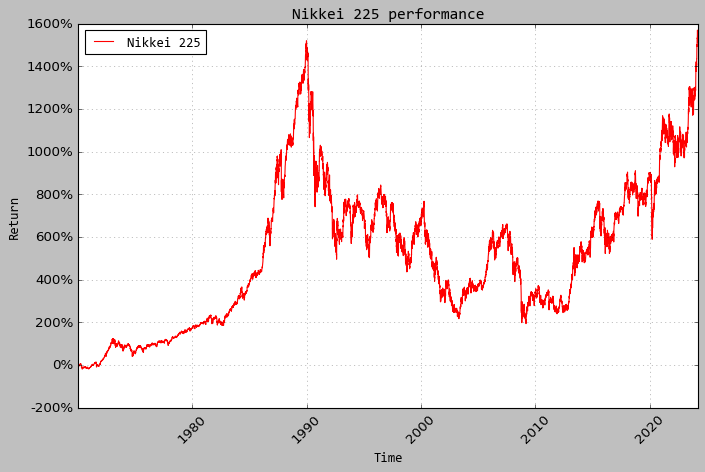

In [24]:
def percent_formatter(x, pos):
    return '{:.0f}%'.format(x*100)
plt.style.use('classic')
plt.figure(figsize=(10,6))
plt.grid(True, alpha= 0.45)
plt.plot(accum_returns['^N225'], color= 'red', label = 'Nikkei 225')
plt.xticks(rotation= 45)
font = 'Consolas'
plt.rcParams['font.family'] = font
plt.ylabel('Return', fontdict={'family': font})
plt.xlabel('Time', fontdict={'family': font})
plt.title('Nikkei 225 performance', fontdict={'family': font})
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))
plt.legend(loc= 'upper left', fontsize= 12)

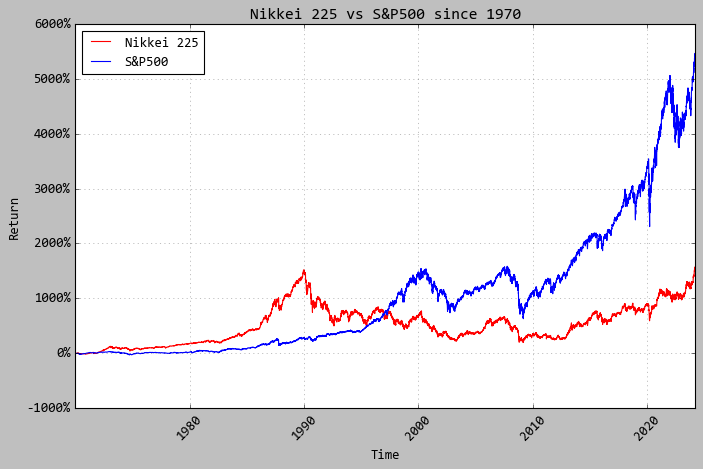

In [26]:
def percent_formatter(x, pos):
    return '{:.0f}%'.format(x*100)
plt.figure(figsize=(10,6))
plt.grid(True, alpha= 0.45)
plt.plot(accum_returns['^N225'], color= 'red', label = 'Nikkei 225')
plt.plot(accum_returns['^GSPC'], color= 'blue', label = 'S&P500')
plt.xticks(rotation= 45)
font = 'Consolas'
plt.rcParams['font.family'] = font
plt.ylabel('Return', fontdict={'family': font})
plt.xlabel('Time', fontdict={'family': font})
plt.title('Nikkei 225 vs S&P500 since 1970', fontdict={'family': font})
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))
plt.legend(loc= 'upper left', fontsize= 12)

In [28]:
for i in indices:
    print(f'{i} performance: {accum_returns[i].iloc[-1]:.2%}')

^N225 performance: 1510.91%
^GSPC performance: 5444.06%
^BVSP performance: 516281.22%
